<h1 style="text-align:center;">Overall Analysis</h1>

<p style="text-align:center;"><img src="https://www.timesofsports.com/wp-content/uploads/2021/10/Vivo-IPL-2021-Final-Details.jpeg" width=700px height=500px></p> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("./PROJECT_IPL_1_Edited.csv")
data.rename(columns={'Player Name':'Player_Name','Base Price (in Lakhs Rupees)':'Base_Price','Price Paid (in Lakhs Rupees)':'Price_Paid','Status':'Status','Bought by':'Bought_by','Previous IPL Teams':'Previous_IPL_Teams','Country':'Country','Role':'Role','Batting Style':'Batting_Style','Bowling Style':'Bowling_Style','Batting Order':'Batting_Order','Capped or Uncapped at Internationals (during Auction)':'Capped_or_Uncapped'},inplace='True')
data.loc[data["Role"] == "Fast Bowler", "Role"] = "Seam Bowler"


<h2 style="text-align:center;"> Overall Anaysis - IPL </h2>

<h3>Total amount spent during auction (in crores): </h3>

In [2]:
data['Price_Paid'].sum()/100

148.6

<h3>Highest bid - Overall: </h3>

In [3]:
data[data['Price_Paid']==data['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


<h3>Highest Indian bid - Overall: </h3>

In [4]:
data[data['Price_Paid']==data[data['Country']=='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


<h3>Highest Foreign bid - Overall: </h3>

In [5]:
data[data['Price_Paid']==data[data['Country']!='India']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


<h3>Amount Spent on each Department (in crores): </h3>

In [6]:
print((data.groupby('Role')['Price_Paid'].sum()/100).to_string())

Role
All Rounder              17.85
Batsman                  13.35
Batting All Rounder      25.40
Bowling All Rounder      39.50
Seam Bowler              45.00
Spin Bowler               4.70
Wicket Keeper Batsman     2.80


<h3>Highest batsman bid - Overall:  </h3>

In [7]:
data_bats=data[data['Role'].str.contains('Batsman')]
data_bats[data_bats['Price_Paid']==data_bats['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped


<h3>Highest bowler bid - Overall: </h3>

In [8]:
data_bowl=data[data['Role'].str.contains('Bowler')]
data_bowl[data_bowl['Price_Paid']==data_bowl['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped


<h3>Highest All Rounder bid - Overall: </h3>

In [9]:
data_all=data[data['Role'].str.contains('All Rounder')]
data_all[data_all['Price_Paid']==data_all['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


<h3>Highest Capped bid - Overall: </h3>

In [10]:
data[data['Price_Paid']==data[data['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped


<h3>Highest Uncapped bid - Overall: </h3>

In [11]:
data[data['Price_Paid']==data[data['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


<h3>Visualization of distribution of Amount spent by all teams on each department: </h3>

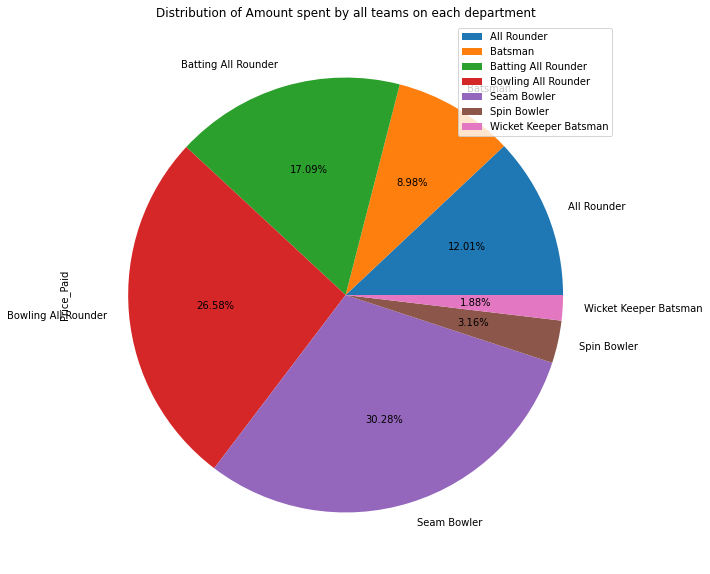

In [12]:
data.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by all teams on each department").legend(loc='upper right');

<h3>No. of IPL Experienced and inexperienced Players bought - Overall: </h3>

In [13]:
print("Experienced Players:     ",data[pd.notnull(data['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",data[pd.isnull(data['Previous_IPL_Teams'])].shape[0])

Experienced Players:      37
Inexperienced Players:    23


<h3>No. of Internationally Experienced and inexperienced Players bought - Overall:  </h3>

In [14]:
print("Experienced Players:     ",data[data['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",data[data['Capped_or_Uncapped']=='Uncapped'].shape[0])

Experienced Players:      30
Inexperienced Players:    30


<h3>No. of players bought at</h3>

In [15]:
print("Base Price:           ",data[data['Price_Paid']==data['Base_Price']].shape[0])
print("More than Base Price: ",data[data['Price_Paid']!=data['Base_Price']].shape[0])

Base Price:            39
More than Base Price:  21
